Objetivo deste código é estudar sobre dados com alta dimensionalidade, causa de processos lentos e o overfitting de modelos. 

Ao decorrer do estudo, será realizado uma otimização de uma base de dados de exames médicos para diagnóstico de um tipo de câncer, para que seja possível reduzir o número de exames necessários para realizar tal diagnóstico

In [1]:
import pandas as pd

resultados_exames=pd.read_csv("exames.csv")

In [2]:
resultados_exames.head(10)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
5,843786,M,12.45,15.70,82.57,103.78,477.1,0.12780,0.17000,0.15780,...,103.40,741.6,0.1791,0.5249,0.5355,0.786,0.1741,0.3985,0.12440,0.804347
6,844359,M,18.25,19.98,119.60,103.78,1040.0,0.09463,0.10900,0.11270,...,153.20,1606.0,0.1442,0.2576,0.3784,0.786,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,103.78,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.786,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,103.78,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.786,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,103.78,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.786,0.2210,0.4366,0.20750,NaN


In [3]:
resultados_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

Percebe-se que a base possui 35 colunas: 33 de exames, 1 de id e 1 de diagnóstico.

Como primeira verificação, veremos se há alguma coluna com dados vazios.

In [4]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

Encontramos 419 valores nulos na coluna 33. Ou seja, é um exame que possui muitos valores nulos, o que geraria um grande impacto se o mesmo fosse utilizado em algum modelo, seja de predição ou classificação.

Para avaliar o desempenho de um modelo de Classificação com essa base de dados, será utilizado o Random Forest (métrica que considera N árvores de decisão) para medir a acurácia (grandeza que considera a soma dos valores positivos verdadeiros e negativos verdadeiros)

In [5]:
from sklearn.model_selection import train_test_split
from numpy import random

In [44]:
SEED = 100
#random.seed = SEED

valores_exames = resultados_exames.drop(columns=['id','diagnostico'])
valores_exames_v1 = valores_exames.drop(columns='exame_33')
diagnostico = resultados_exames['diagnostico']

treino_x,teste_x,treino_y,teste_y = train_test_split(valores_exames_v1,diagnostico,random_state=10)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
classificador = RandomForestClassifier(n_estimators = 100,random_state=SEED)

classificador.fit(treino_x,treino_y)

print("Acurácia da Classificação por RandomForest: %.2f%%" %(classificador.score(teste_x,teste_y)*100))

Acurácia da Classificação por RandomForest: 98.60%


Conseguimos uma acurácia de 98.60%! Mas essa acurácia por si só não me diz muita coisa. É necessário que possamos comparar com alguma outra classificação, para que possamos definir de fato o quão melhor a nossa classificação é.

Portanto, se considerarmos uma classificação simples e genérica, conhecida como Dummy, podemos comparar ambas e avaliar o desempenho da primeira.

A Classificação Dummy será mensurada de que forma? Simples! Irá considerar que, dado o diagnóstico presente na base de dados, o resultado que for mais frequente (diagnóstico positivo ou diagnóstico negativo), será utilizado como resultado da Classificação Dummy para todos os dados. Ou seja, uma classificação bem básica, apenas para fins de comparação.

In [47]:
from sklearn.dummy import DummyClassifier

In [48]:
SEED = 100
#random.seed = SEED

classificador_dummy = DummyClassifier(strategy='most_frequent',random_state=100)
classificador_dummy.fit(treino_x,treino_y)

print("Acurácia da Classificação Dummy: %.2f%%" %(classificador_dummy.score(teste_x,teste_y)*100))

Acurácia da Classificação Dummy: 63.64%


Obtivemos um resultado de Classificação Dummy de 63.64%! Ou seja, nossa classificação de Random Forest de fato está bem melhor em termos de classificação!

Ok, validamos nossa classificação! Mas será que podemos otimizar mais ainda? Diminuir quantidade de colunas, dados e etc?

Vamos verificar graficamente o comportamento dos dados pelo chamado Gráfico de Violino:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

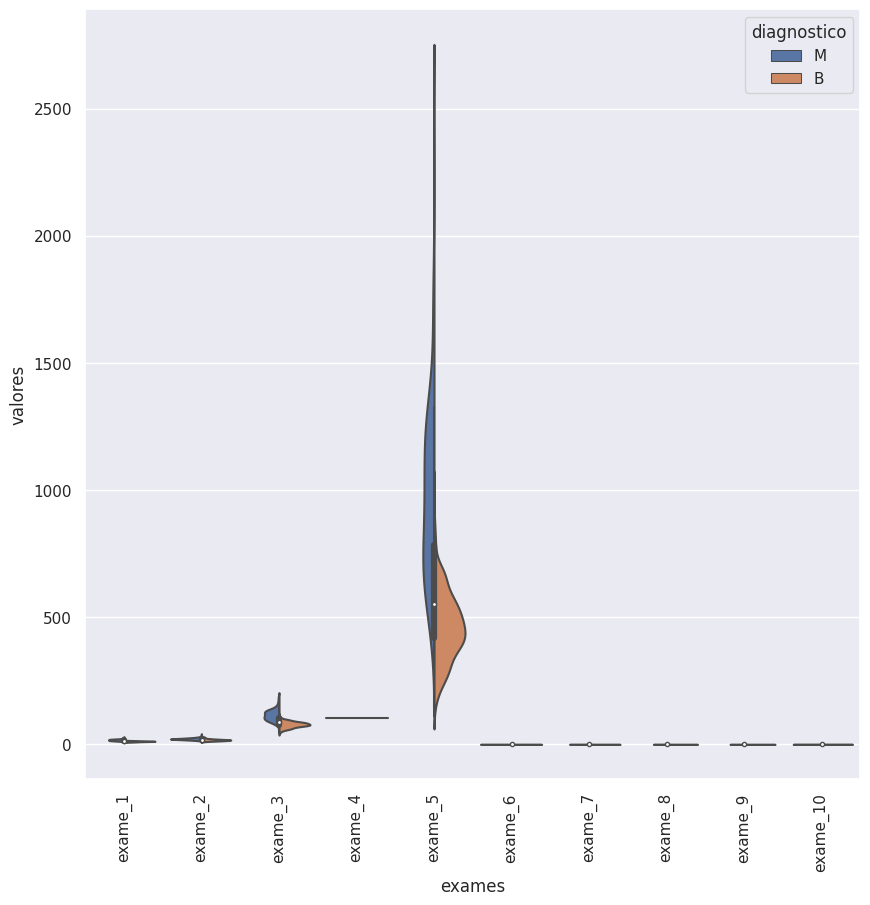

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnostico,valores_exames_v1.iloc[:,0:10]],axis=1)
dados_plot=pd.melt(dados_plot,id_vars="diagnostico",var_name="exames",value_name="valores")

plt.figure(figsize=(10,10))
sns.violinplot(x='exames', y = 'valores', hue='diagnostico', data=dados_plot,split=True)
plt.xticks(rotation=90)

Vemos que, apenas plotando os resultados dos 10 primeiros exames, comparando os resultados M(malignos) e B(benignos), o exame 5 está fora de proporção. Ele possui valores numéricos muito superiores aos valores dos exames restantes presentes neste intervalo.

A saída? Normalizar a base de dados!


In [50]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
norm.fit(valores_exames_v1)
valores_exames_v2 = norm.transform(valores_exames_v1)

valores_exames_v2

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [51]:
valores_exames_v2=pd.DataFrame(data=valores_exames_v2,columns=valores_exames_v1.keys())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

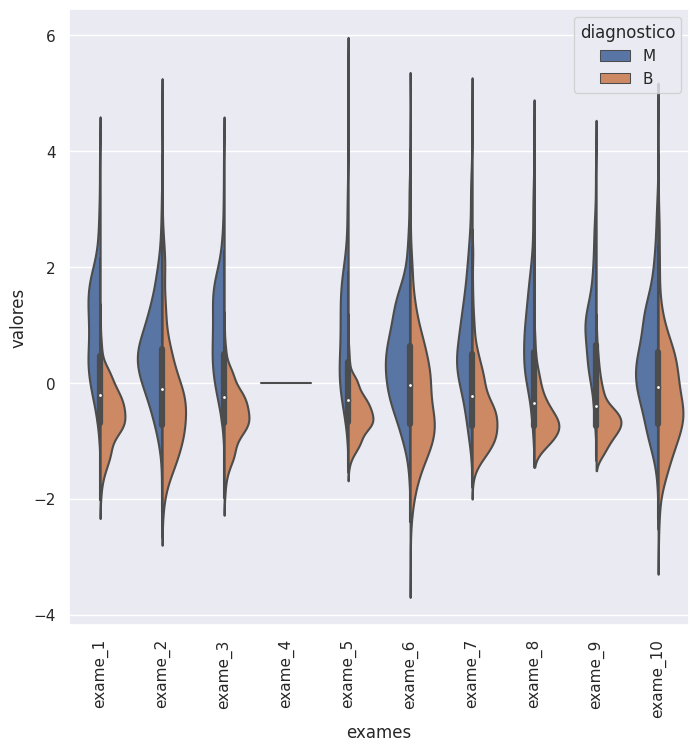

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnostico,valores_exames_v2.iloc[:,0:10]],axis=1)
dados_plot=pd.melt(dados_plot,id_vars="diagnostico",var_name="exames",value_name="valores")

plt.figure(figsize=(8,8))
sns.violinplot(x='exames', y = 'valores', hue='diagnostico', data=dados_plot,split=True)
plt.xticks(rotation=90)

Ótimo! Normalizamos a nossa base dados, e agora, é possível enxergar melhor o comportamento dos resultados obtidos. O gráfico de violino é composto de dois lados que representam diferentes curvas. Quanto maior a amplitude da curva, maior a densidade de dados identificados no valor definido. 

Portanto, gráficos de violino onde uma curva chega ao seu pico enquanto a sua curva em espelho ainda está em crescente ou em decrescente é normal. Isso acontece pois o resultado de Benigno e Maligno precisam ser diferentes mesmo! Precisa ser facilmente distinguível um resultado do outro e, claro, na transição de um valor para outro no eixo y, aumentamos a chance de encontrar outro resultado.

Mas, neste intervalo até o exame de número 10, vemos que o exame de número 4 não tem intervalo algum. Vamos verificá-lo:

In [53]:
valores_exames_v1.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

In [54]:
valores_exames_v2.exame_4

0      1.421085e-14
1      1.421085e-14
2      1.421085e-14
3      1.421085e-14
4      1.421085e-14
           ...     
564    1.421085e-14
565    1.421085e-14
566    1.421085e-14
567    1.421085e-14
568    1.421085e-14
Name: exame_4, Length: 569, dtype: float64

Certo, notamos então que o exame 4 tem o mesmo valor sempre, ou seja, ele tem algo errado ou não teria impacto nenhum já que não possui variação. Vamos analisar se existe algum outro exame com característica semelhante a esse para que possamos descartá-los.

In [55]:
def grafico_violino(valores,inicio,fim):
    dados_plot = pd.concat([diagnostico,valores.iloc[:,inicio:fim]],axis=1)
    dados_plot=pd.melt(dados_plot,id_vars="diagnostico",var_name="exames",value_name="valores")

    plt.figure(figsize=(8,8))
    sns.violinplot(x='exames', y = 'valores', hue='diagnostico', data=dados_plot,split=True)
    plt.xticks(rotation=90)

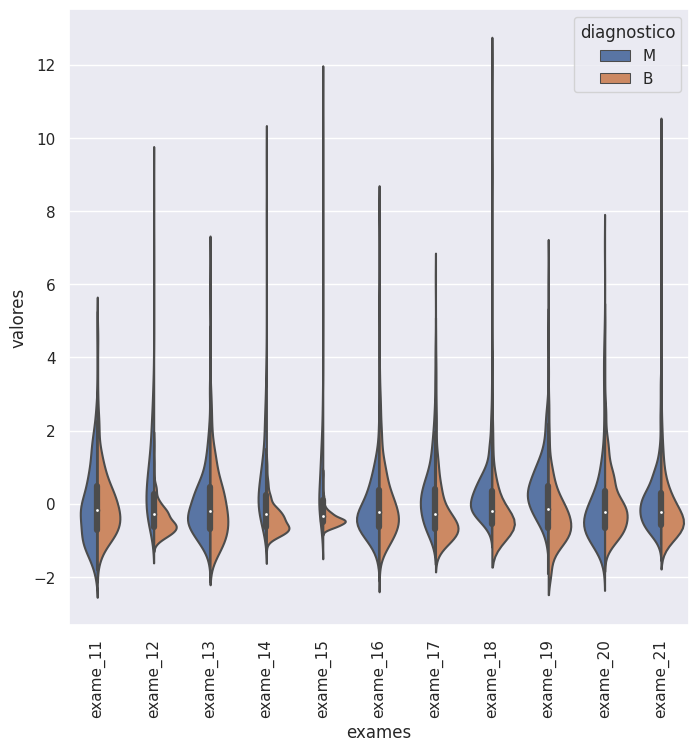

In [56]:
grafico_violino(valores_exames_v2,10,21)

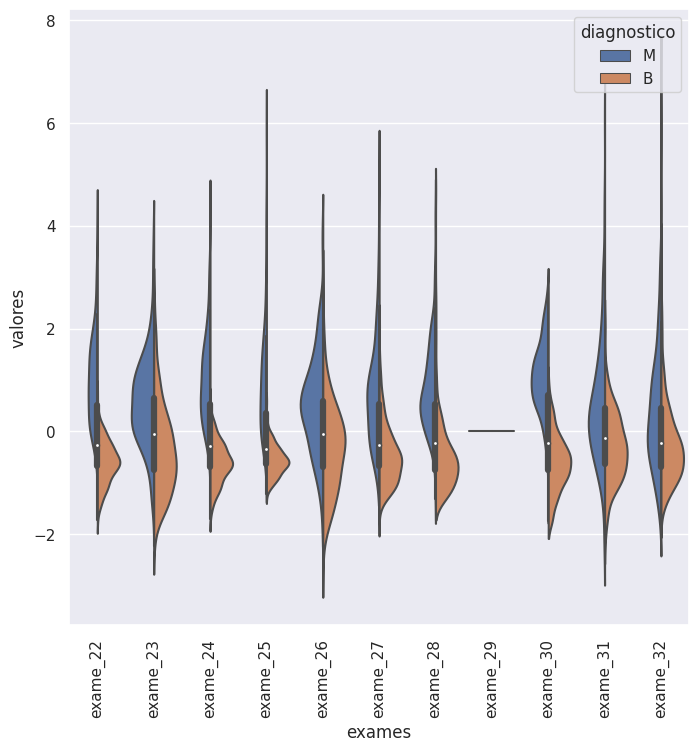

In [57]:
grafico_violino(valores_exames_v2,21
                ,32)

Além do exame 4, encontramos também o exame 29 neste formato.

Após descartarmos as colunas, criamos uma função para utilizar o Random Forest (visto que utilizaremos a função mais algumas vezes) e testamos a classificação com a nova base de dados.

In [58]:
valores_exames_v3=valores_exames_v2.drop(columns=['exame_29','exame_4'])

In [59]:
def classificar_RandomForest(valores):
  SEED = 100
  #random.seed=SEED
  treino_x,teste_x,treino_y,teste_y = train_test_split(valores,diagnostico,random_state=10)
  classificador = RandomForestClassifier(n_estimators = 100, random_state=SEED)
  classificador.fit(treino_x,treino_y)
  print("Acurácia da Classificação por RandomForest: %.2f%%" %(classificador.score(teste_x,teste_y)*100))

In [60]:
classificar_RandomForest(valores_exames_v3)

Acurácia da Classificação por RandomForest: 97.20%


In [61]:
classificar_RandomForest(valores_exames_v2)

Acurácia da Classificação por RandomForest: 98.60%


A nossa acurácia caiu em, aproximadamente, 1.4%, mas eliminamos duas colunas inteiras, ou seja, em termos práticos, diminuimos dois exames necessários que um paciente precisa fazer e estamos com praticamente o mesmo resultado.

Vamos agora analisar a correlação dos valores dessa base de dados. Utilizando a matriz de calor, verificamos visualmente se há dependência em dupla de valores da matriz, que nada mais é que cada coluna da base de dados.

<Axes: >

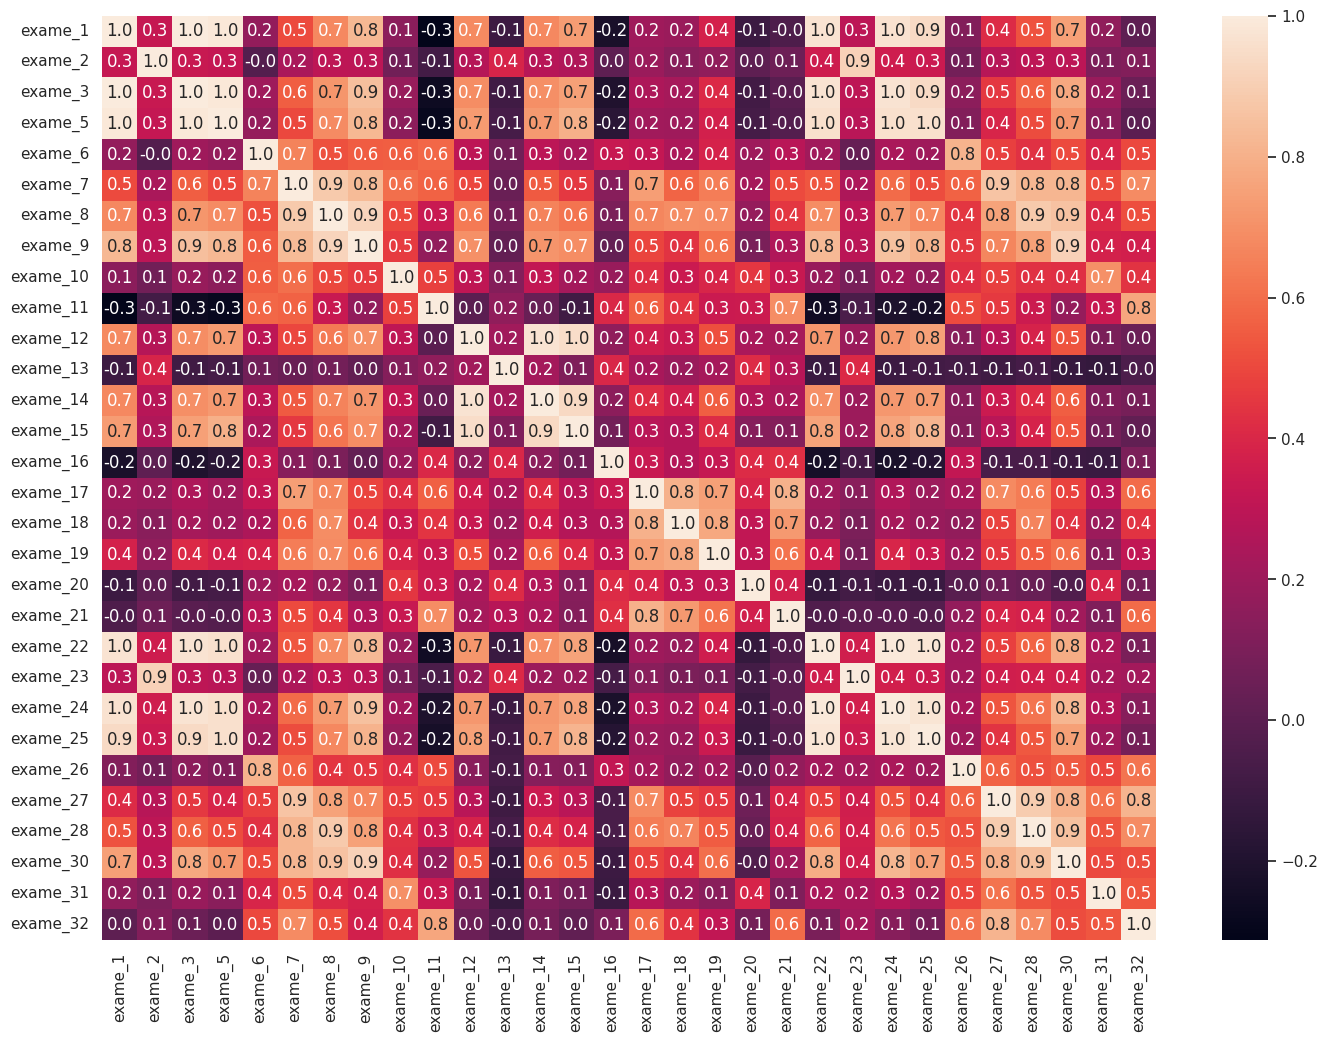

In [62]:
matriz_corr = valores_exames_v3.corr()
plt.figure(figsize=(17,12))
sns.heatmap(matriz_corr, annot = True,fmt=".1f")

Temos muitos dados para analisar, então, vamos verificar aqueles em que a correlação está acima de 0.99.

In [63]:
matriz_corr_v1 = matriz_corr[matriz_corr>0.99]
matriz_corr_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
matriz_corr_v2=matriz_corr_v1.sum()
matriz_corr_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [65]:
var_corr = matriz_corr_v2[matriz_corr_v2>1]
var_corr

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [66]:
valores_exames_v4 = valores_exames_v3.drop(columns=var_corr.keys())

Encontramos então 4 colunas de exames que estão com valores de correlação acentuados. Isso significa que duas duplas de valores são praticamente idênticas, ou seja, para cada dupla, um valor, a priori, pode ser descartado visto que o resultado da correlação é o mesmo que outro exame mensurado.

Neste caso, o exame 1 e 3 são correlacionados e o exame 22 e 24 também são correlacionados entre si.

Estávamos anteriormente em uma acurácia de 97.2%. Agora, se retirarmos os 4 exames correlacionados entre si por duplas, como ficará nossa acurácia?

In [70]:
classificar_RandomForest(valores_exames_v4)

Acurácia da Classificação por RandomForest: 98.60%


Conseguimos 98.6%! 

Porém, não podemos excluir as 4 colunas de uma vez. Os 4 exames possuem intervalos de valor e fazem a diferença para o resultado. Portanto, o que podemos realizar é excluir uma coluna de cada coluna relacionada, fazendo isso, podemos calcular a nova acurácia:


In [71]:
valores_exames_v5=valores_exames_v3.drop(columns=['exame_3','exame_24'])

In [72]:
classificar_RandomForest(valores_exames_v5)

Acurácia da Classificação por RandomForest: 98.60%


Conseguimos manter a mesma acurácia!

Agora,com intuito de automatizarmos a escolha das features, iremos selecionar as melhores features, ou exames nesse caso, para que possamos reduzir ainda mais a quantidade de exames necessários. Como isso irá funcionar? Iremos mensurar uma pontuação para cada exame através do teste de chi quadrado, que, embora seja melhor utilizado para variáveis categóricas, também pode ser utilizado nesta instância para fins de verificação.

Para isso, utilizamos o Kbest, para selecionar as melhores features mensuradas pelas pontuações via chi quadrado.

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [74]:
valores_exames_v5.head(5)

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


A função não pode estar normalizada para isso, portanto, iremos voltar em ua versão anterior da variável valor antes de ser normalizada e tirar as mesmas colunas que havíamos retirado no decorrer do script.

In [75]:
valores_exames_v6=valores_exames_v1.drop(columns=['exame_4','exame_29','exame_3','exame_24'])

In [76]:
selecionar_kmelhores = SelectKBest(chi2,k=7)

SEED = 100
#random.seed = 100

treino_x,teste_x,treino_y,teste_y = train_test_split(valores_exames_v6,diagnostico,random_state=10)
selecionar_kmelhores.fit(treino_x,treino_y)

treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [77]:
classificador = RandomForestClassifier(n_estimators=100, random_state=100)
classificador.fit(treino_kbest,treino_y)
print("Acurácia da Classificação com Kbest: %.2f%%" %(classificador.score(teste_kbest,teste_y)*100))



Acurácia da Classificação com Kbest: 94.41%


Obtivemos agora uma acurácia de 94.41% para a classificação, utilizando somente as 7 melhores features, ou seja, os 7 exames que mais pontuaram de acordo com a função de chi quadrado. Um pouco abaixo do resultado que obtivemos fazendo ajustes manuais, porém, podemos avaliar melhor o desempenho através da matriz de confusão.

A matriz de confusão, nos exemplifica o cálculo para acurácia, conseguimos ver o resultados das classificações como verdadeiro positivo, falso positivo, falso negativo e verdadeiro negativo.

In [78]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_kbest))

In [79]:
matriz_confusao

array([[86,  5],
       [ 3, 49]])

[Text(0.5, 19.049999999999997, 'Predição'), Text(46.25, 0.5, 'Real')]

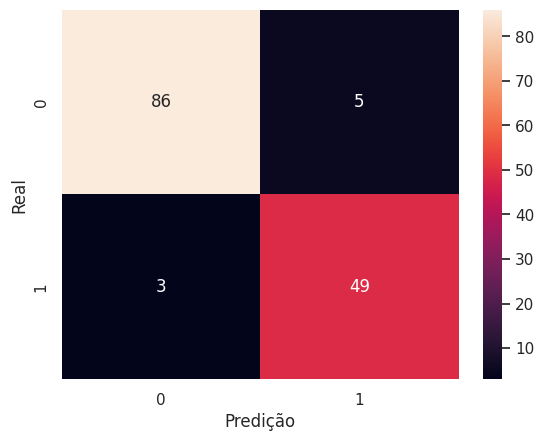

In [80]:
sns.set()
sns.heatmap(matriz_confusao,annot = True, fmt="d").set(xlabel="Predição",ylabel="Real")

E se utilizássemos de outra função para otimização das features selecionadas? Ao invés de utilizarmos a função de Kbest, utilizamos o RFE ou Recursive Feature Elimination com a mesma finalidade. Qual seria a nova acurácia e a matriz de calor?

Acurácia da Classificação com RFE: 97.20%


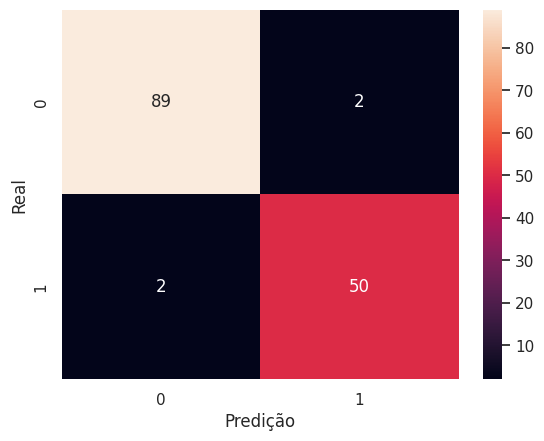

In [81]:
from sklearn.feature_selection import RFE

SEED = 100
#random.seed = 100

treino_x,teste_x,treino_y,teste_y = train_test_split(valores_exames_v6,diagnostico,random_state=10)
classificador = RandomForestClassifier(n_estimators=100, random_state=100)
classificador.fit(treino_x,treino_y)

selecionador_RFE= RFE(estimator=classificador,n_features_to_select=7,step=1)
selecionador_RFE.fit(treino_x,treino_y)
treino_rfe = selecionador_RFE.transform(treino_x)
teste_rfe = selecionador_RFE.transform(teste_x)

classificador.fit(treino_rfe,treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
sns.set()
sns.heatmap(matriz_confusao,annot = True, fmt="d").set(xlabel="Predição",ylabel="Real")

print("Acurácia da Classificação com RFE: %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

Aumentamos a nossa classificação para uma acurácia para 97.2%! Mas existe um outro modelo de aplicação do RFE chamado RFECV, onde o CV está para Cross-Validation. Basicamente, o que é feito nesta função é separar a base de dados em N partes e realizar o modelo padrão RFE sempre desconsiderando um dos pedaços separados de dados. Desta forma, será encontrada a melhor combinação de features mas demandará um custo computacional um pouco maior do que o custo da utilização do RFE padrão.

Acurácia da Classificação com RFECV: 98.60%


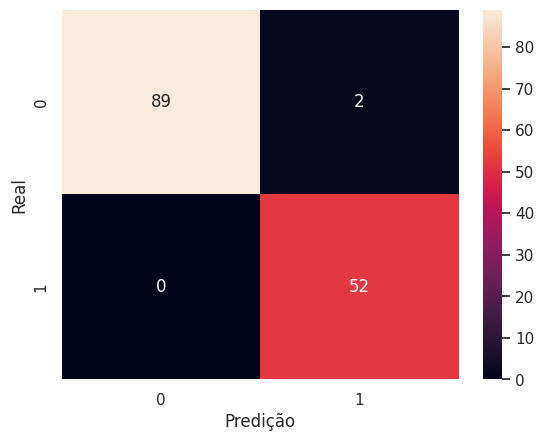

In [43]:
from sklearn.feature_selection import RFECV

SEED = 100
#random.seed = 100

treino_x,teste_x,treino_y,teste_y = train_test_split(valores_exames_v6,diagnostico,random_state=10)
classificador = RandomForestClassifier(n_estimators=100, random_state=100)
classificador.fit(treino_x,treino_y)

selecionador_RFECV= RFECV(estimator=classificador,cv=5,step=1,scoring="accuracy")
selecionador_RFECV.fit(treino_x,treino_y)
treino_rfecv = selecionador_RFECV.transform(treino_x)
teste_rfecv = selecionador_RFECV.transform(teste_x)

classificador.fit(treino_rfecv,treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfecv))
sns.set()
sns.heatmap(matriz_confusao,annot = True, fmt="d").set(xlabel="Predição",ylabel="Real")

print("Acurácia da Classificação com RFECV: %.2f%%" %(classificador.score(teste_rfecv,teste_y)*100))

In [42]:
selecionador_RFECV.n_features_

13

Ou seja, conseguimos alcançar o valor e acurácia de 98.6% igual ao que obtivemos manualmente, porém agora através de uma função para otimizar a quantidade de features utilizadas para mensurar a acurácia. Enquanto começamos nosso script com 33 exames, mostramos nesta última etapa, que conseguimos atingir uma acurácia para a classificação com a função RFECV de 98.6% utilizando apenas 13 features! 

Reduzimos então, bastante a quantidade de features utilizadas e atingimos um resultado satisfatório para classificação. A redução da alta dimensionalidade é importante pois isso afeta o custo computacional e o overfitting de modelos! Além disso, tratando-se de um tema médico, é muito importante reduzirmos os valores de falso positivos e falso negativos, e o resultado obtido refletiu exatamente essa demanda!